In [12]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
import decision_tree.tools as tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
documents = pd.read_csv("..\\data\\external_data.csv",  encoding='ISO-8859-2')
documents = documents.drop(columns = ['Unnamed: 0'])

with open('..\\data\\polish.stopwords.txt', 'r', encoding='ISO-8859-2') as f:
    stopwords = set(f.read().split())

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='ISO-8859-2', stop_words=stopwords)
features = tfidf.fit_transform(documents.text).toarray()
labels = documents.category


C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aleĺź', 'aĺ', 'aĺź', 'byä', 'byĺ', 'bä', 'caĺ', 'cej', 'ciä', 'coĺ', 'dokä', 'doĺ', 'duĺźo', 'dzie', 'dziĺ', 'dzy', 'dä', 'gdyĺź', 'gdzieĺ', 'iĺź', 'jakaĺ', 'jakichĺ', 'jakiĺ', 'jakiĺź', 'jakoĺ', 'jednakĺźe', 'jeĺ', 'jeĺźeli', 'juĺź', 'jä', 'kaĺźdy', 'kimĺ', 'ktoĺ', 'ktăłra', 'ktăłre', 'ktăłrego', 'ktăłrej', 'ktăłry', 'ktăłrych', 'ktăłrym', 'ktăłrzy', 'li', 'majä', 'maĺ', 'miä', 'mnä', 'mogä', 'moĺźe', 'moĺźliwe', 'moĺźna', 'măłj', 'niä', 'niĺź', 'okoĺ', 'poniewaĺź', 'przecieĺź', 'răłwnieĺź', 'siä', 'skä', 'sobä', 'sposăłb', 'sä', 'takĺźe', 'teĺź', 'tobä', 'toteĺź', 'totobä', 'twăłj', 'ug', 'wedĺ', 'wiä', 'wĺ', 'znăłw', 'zostaĺ', 'zĺ', 'ĺźaden', 'ĺźadna', 'ĺźadne', 'ĺźadnych', 'ĺźe', 'ĺźeby'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [3]:
feature_selector = tools.selector(1000, features, labels, chi2)
clf  = DecisionTreeClassifier()
cv_test_scores = cross_val_score(clf, feature_selector, labels, cv=5, scoring='accuracy')


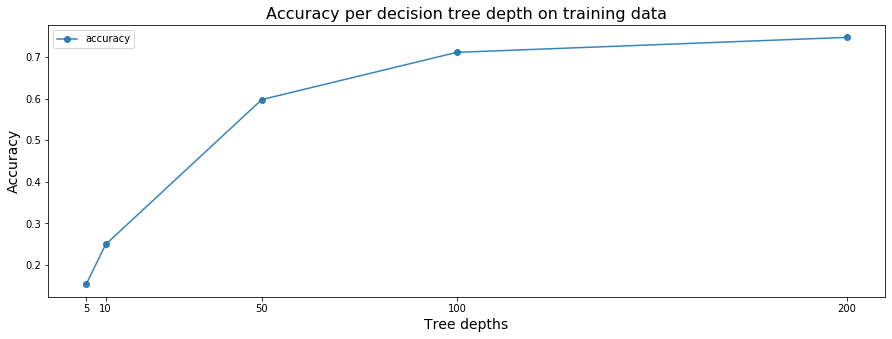

In [4]:
feature_selector = tools.selector(1000, features, labels, chi2)

depths = [5,10, 50, 100, 200]
scores = tools.examine_tree_depth(depths, labels, feature_selector)

tools.plot_accuracy(scores, 
                               'Accuracy ~ tree depth',
                               'Tree depths', depths)
plt.savefig('tree_depth.png')

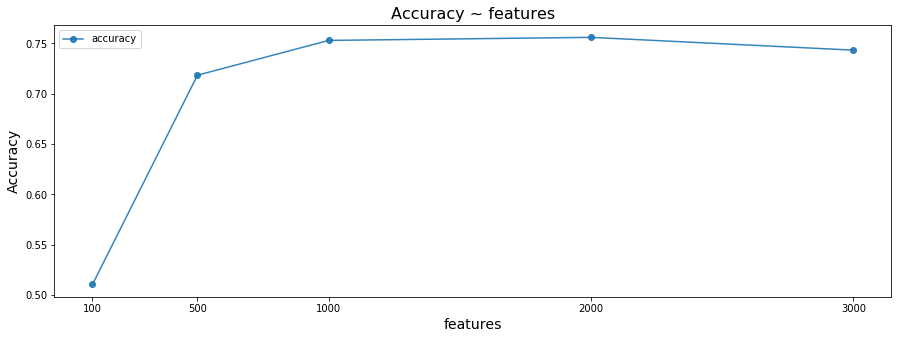

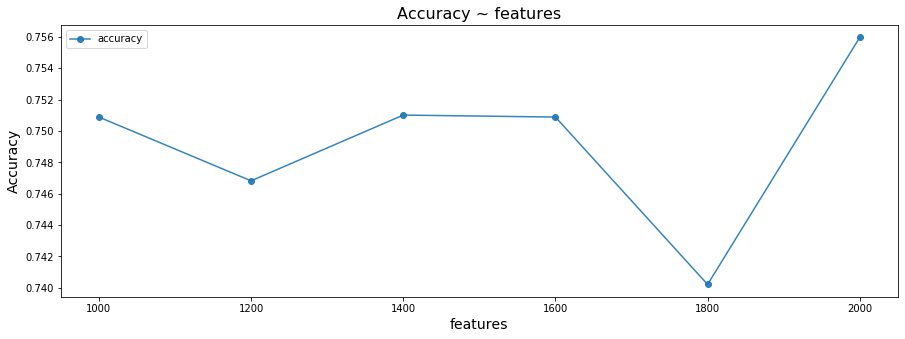

In [26]:
n_features = [100, 500, 1000, 2000, 3000]
scores = tools.examine_features(n_features, labels, chi2, features, DecisionTreeClassifier())

tools.plot_accuracy(scores, 
                               'Accuracy ~ features',
                               'features', n_features)
plt.savefig('tree-features.png')

n_features = [1000,1200,1400,1600,1800,2000]
scores = tools.examine_features(n_features, labels, chi2, features, DecisionTreeClassifier())

tools.plot_accuracy(scores, 
                               'Accuracy ~ features',
                               'features', n_features)
plt.savefig('tree-features2.png')

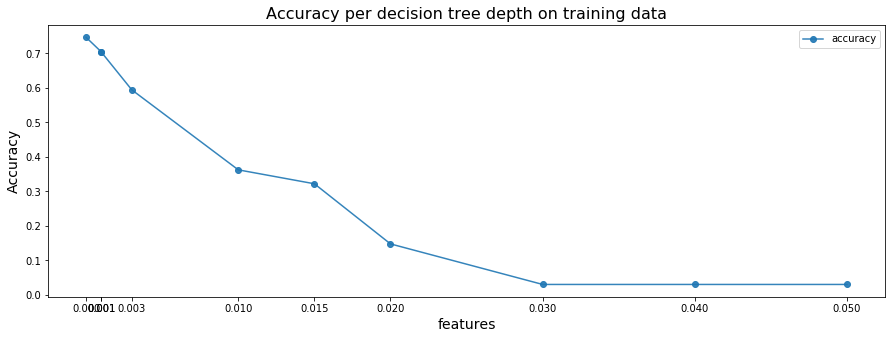

In [4]:
prunings = [0, 0.001, 0.001, 0.003, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05]
feature_selector = tools.selector(1350, features, labels, chi2)
scores = tools.examine_tree_pruning(prunings, labels, feature_selector)
tools.plot_accuracy(scores, 
                               'Accuracy ~ prunings',
                               'prunings', prunings)
plt.savefig('tree-prune.png')


In [6]:
feature_selectors = [chi2, f_classif]
clf  = DecisionTreeClassifier()
for sel in feature_selectors:
    print(cross_val_score(clf, tools.selector(1500, features, labels, sel), labels, cv=5, scoring='accuracy'))


[0.74237805 0.74085366 0.75139807 0.74478902 0.74834774]
[0.69715447 0.71747967 0.71276055 0.72343671 0.70310117]


In [9]:
feature_selectors = [chi2, f_classif]
clf  = MultinomialNB(alpha=0.5)
for sel in feature_selectors:
    print(cross_val_score(clf, tools.selector(1350, features, labels, sel), labels, cv=5, scoring='accuracy'))

[0.82418699 0.83333333 0.82968988 0.83579054 0.84341637]
[0.81199187 0.81707317 0.81901373 0.82155567 0.83426538]


In [12]:
feature_selectors = [chi2, f_classif]
clf  = BernoulliNB(alpha=0.5)
for sel in feature_selectors:
    print(cross_val_score(clf, tools.selector(1350, features, labels, sel), labels, cv=5, scoring='accuracy'))




[0.80284553 0.80843496 0.81189629 0.80020336 0.81698017]
[0.7703252  0.76880081 0.77478393 0.78546009 0.7808846 ]


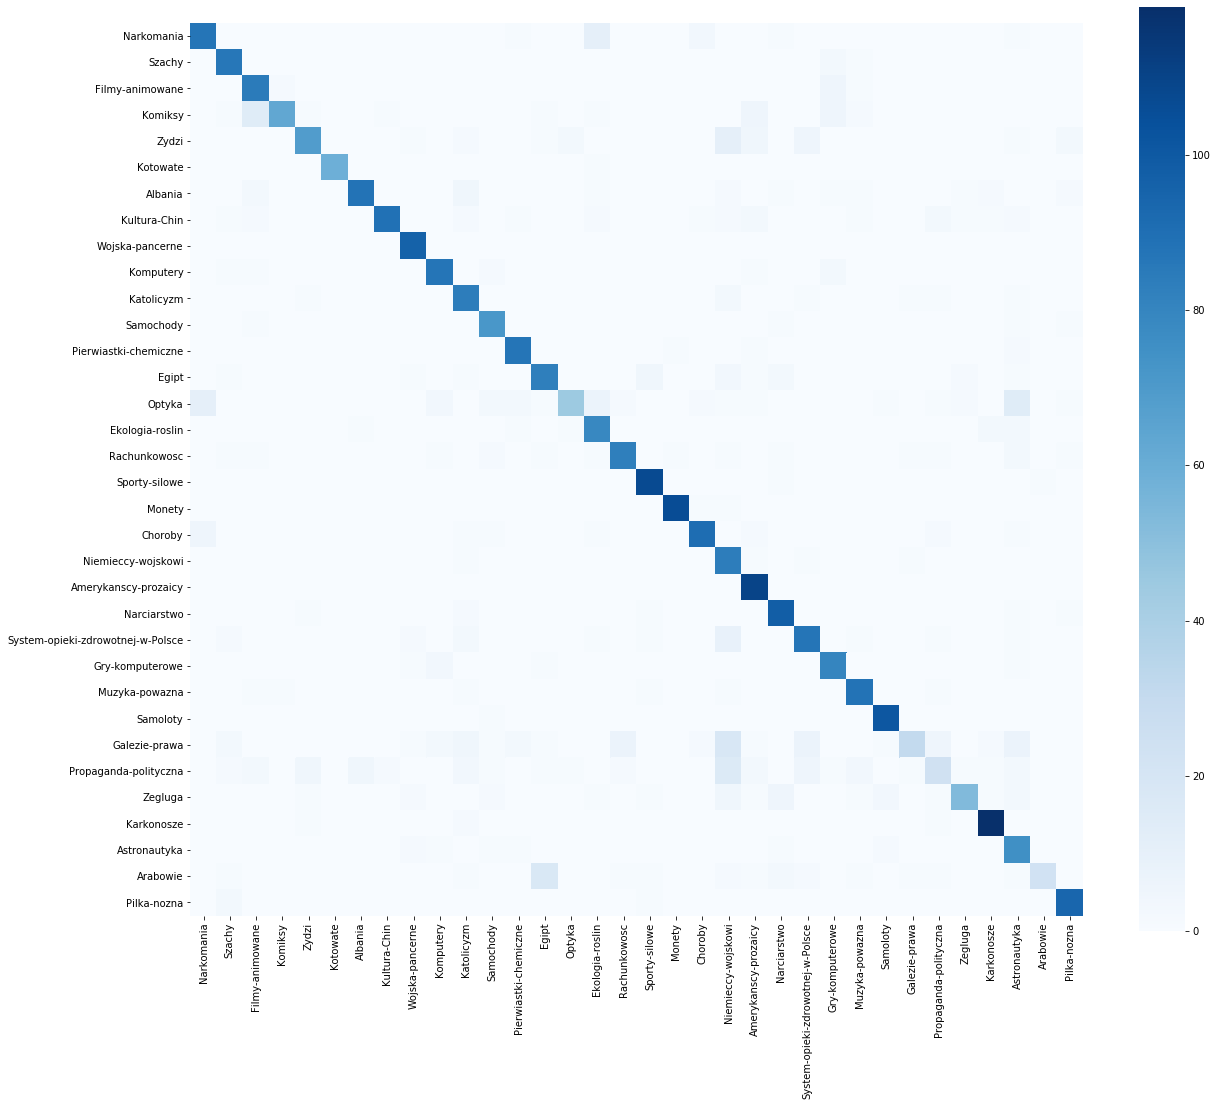

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    tools.selector(1350, features, labels, chi2), labels, test_size=0.33, random_state=42)
mnb  = MultinomialNB(alpha=0.5)
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
unique_labels = list(set(labels))
cm = confusion_matrix(y_test, pred, labels=unique_labels)

plt.figure(figsize=(20, 17))
hm = sns.heatmap(cm, cmap='Blues', square=True)
hm.set_xticklabels(unique_labels)
hm.set_yticklabels(unique_labels)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('mnb_cm.png')


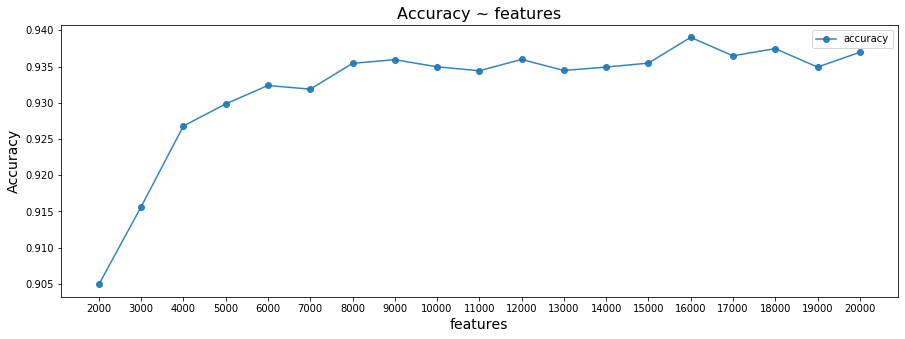

In [23]:
n_features = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
              11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]
scores = tools.examine_features(n_features, labels, chi2, features, LinearSVC())

tools.plot_accuracy(scores, 
                               'Accuracy ~ features',
                               'features', n_features)
plt.savefig('svm-features.png')




In [26]:
clf  = LinearSVC()
print(cross_val_score(clf, tools.selector(16000, features, labels, chi2), labels, cv=5, scoring='accuracy'))



[0.92327236 0.93902439 0.93594306 0.92577529 0.93238434]


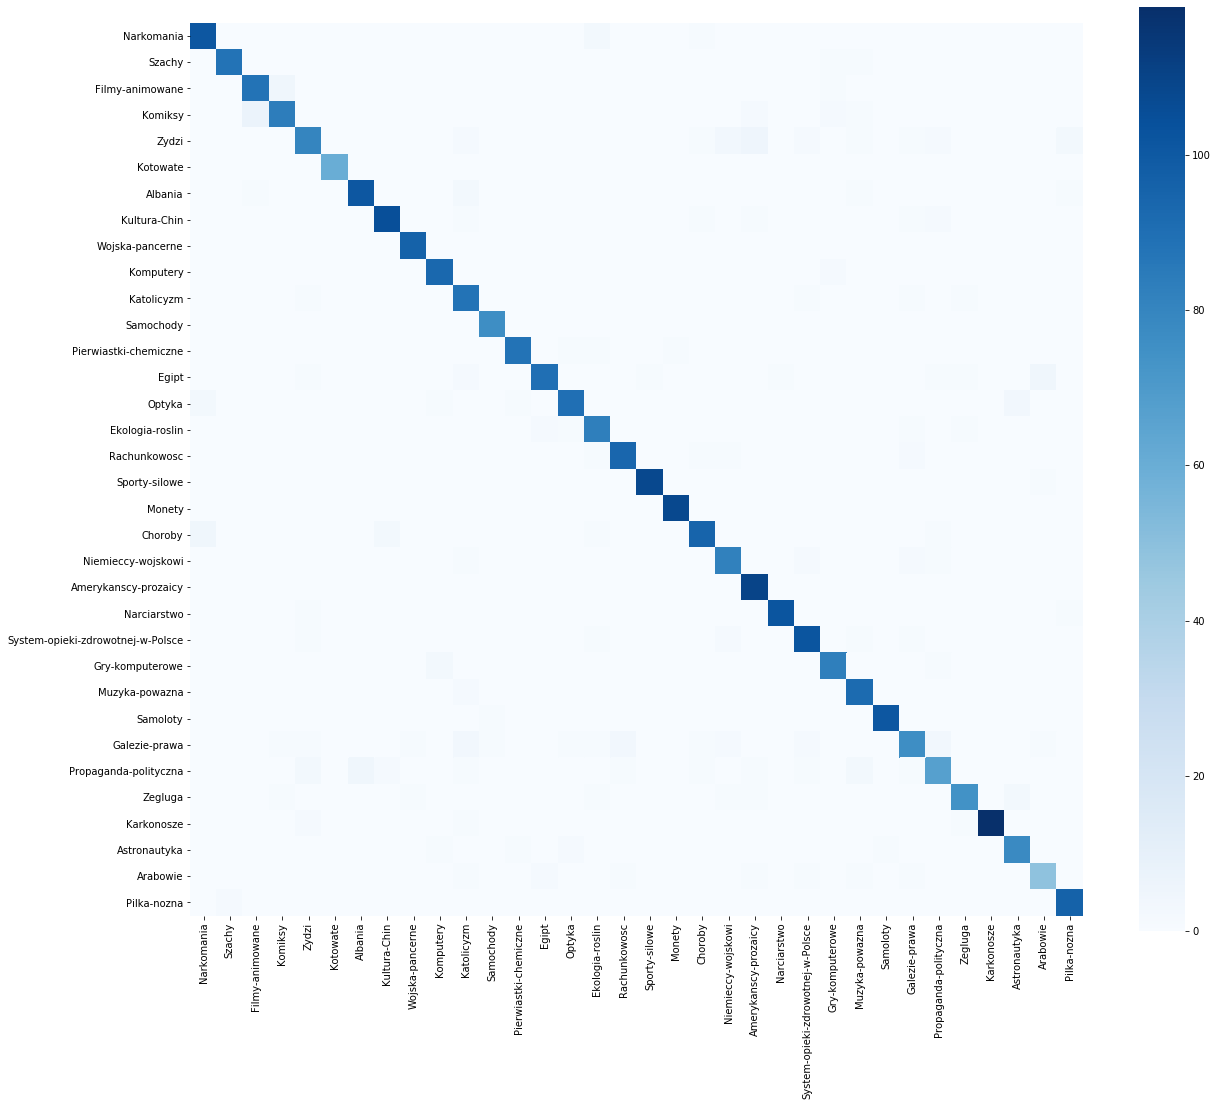

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    tools.selector(16000, features, labels, chi2), labels, test_size=0.33, random_state=42)
svc  = LinearSVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
unique_labels = list(set(labels))
cm = confusion_matrix(y_test, pred, labels=unique_labels)

plt.figure(figsize=(20, 17))
hm = sns.heatmap(cm, cmap='Blues', square=True)
hm.set_xticklabels(unique_labels)
hm.set_yticklabels(unique_labels)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('svc_cm.png')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, random_state=42)
mlp  = MLPClassifier()
mlp.fit(X_train, y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

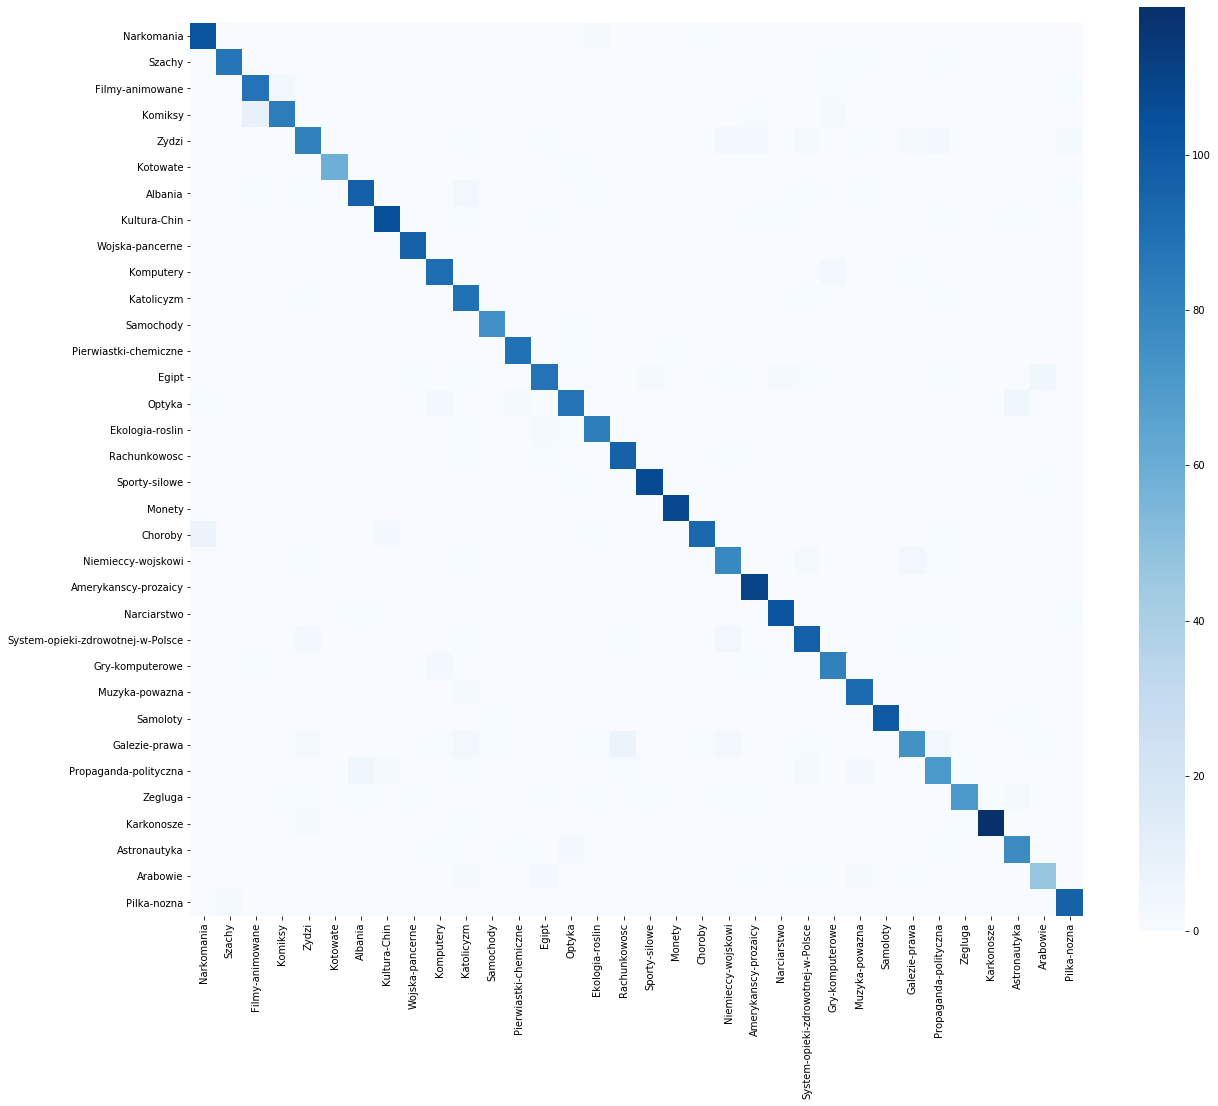

In [19]:
pred = mlp.predict(X_test)
unique_labels = list(set(labels))
cm = confusion_matrix(y_test, pred, labels=unique_labels)

plt.figure(figsize=(20, 17))
hm = sns.heatmap(cm, cmap='Blues', square=True)
hm.set_xticklabels(unique_labels)
hm.set_yticklabels(unique_labels)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('nn_cm.png')